# Wstęp do eksploracji danych w Pythonie

Ten notatnik pomoże Ci zapoznać się z postawowymi elementami eksploracji danych w Pythonie. Po uzupełnieniu tego notatnika powinieneś:

+ znać nazwy podstawowych bibliotek do eksploracji i wizualizacji danych,
+ umieć wczytać zbiór danych,
+ wiedzieć jak wykonać podstawowe operacje na data frame'ie
+ umieć nauczyć i przetestować klasyfikator
+ wiedzieć jak wykonać prosty wykres

## Biblioteki

Oprócz podstawowych elementów języka, do eksploracji danych wykorzystamy klika bibliotek. Podstawowe biblioteki, które będą nam potrzebne to: `matplotlib`, `pandas`, `numpy` i `sklearn`. Część z potrzebnych modułów załadowałem już poniżej: 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, auc, roc_auc_score

**Zad. 3: Załaduj jeszcze dwie biblioteki: pandas z aliasem pd i numpy z aliasem np.**

In [2]:
import pandas as pd
import numpy as np

## Pandas

Najwyższy czas wczytać jakiś zbiór danych. W tym celu wykorzystamy bibliotekę, którą właśnie zaimportowałeś: pandas. Upewnij się, że ściagnięty zbiór danych znajduje się w tym samym folderze co notatnik i podążaj za komentarzami.

**Zad. 4: Wczytaj zbiór titanic do zmiennej `df`.**

In [3]:
df = pd.read_csv('titanic.csv')

Jeśli wszystko poszło dobrze, to zobaczmy jak wygląda pierwsze 10 wierszy zbioru (funkcję o takiej samej nazwie znasz z R).

**Zad. 5: Wyświetl pierwsze 10 wierszy zbioru.**

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Teraz zrobimy coś trochę trudniejszego - odfiltrujemy wybrane kolumny. Warto zajrzeć na http://pandas.pydata.org/pandas-docs/stable/10min.html, żeby zapoznać się z podstawowymi operacjami w pandas.

**Zad. 6: Usuń kolumny PassengerId, Name, Ticket, Cabin. Wynik przypisz do zmiennej `df_filtered`. Wyświetl pierwsze 10 wierszy, żeby upewnić się że operacja się udała.**

In [5]:
df_filtered = df[[c for c in df.columns if c not in ['PassengerId','Name','Ticket','Cabin']]]
df_filtered.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Zanim będziemy mogli wykorzystać jakikolwiek algorytm uczenia maszynowego z scikit-learn, musimy zrobić dwie rzeczy:
- uzupełnić (lub usunąć) brakujące wartości
- zamienić wszystkie atrybuty na liczby

Ponieważ dopiero zaczynamy pracę z pandas, wyeliminujemy wartości brakujące w najprostszy mozliwy sposób - usuniemy wiersze z wartościami pustymi

**Zad. 7: Usuń wiersze z brakującymi wartościami i przypisz wynikowego data fame'a do `df_complete`. Wyświetl pierwsze 10 wierszy i sprawdź czy zniknął piąty przykład.**

In [6]:
df_complete = df_filtered.dropna(axis=0)
df_complete.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


**Zad. 8: Zamień Sex i Embarked na kolumny liczbowe.**

In [7]:
embarked_encodings = {k: v for v, k in enumerate(df['Embarked'].unique())}
sex_encodings = {"female": 0, "male": 1}

df_complete = df_complete.assign(
    Sex = df_complete.Sex.replace(sex_encodings),
    Embarked = df_complete.Embarked.replace(embarked_encodings))
df_complete.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
6,0,1,1,54.0,0,0,51.8625,0
7,0,3,1,2.0,3,1,21.0750,0
8,1,3,0,27.0,0,2,11.1333,0
9,1,2,0,14.0,1,0,30.0708,1
10,1,3,0,4.0,1,1,16.7000,0


Pandas (i numpy na którym bazuje) potrafi dużo, dużo więcej, ale na tę chwilę to co zrobiliśmy nam wystarczy.

## Scikit-learn

Czas przejść do uczenia maszynowego. Korzystając z [dokumentacji scikit-learn](http://scikit-learn.org/stable/) oraz slajdów do zajęć, spróbuj wykonać kolejne zadania. Polecam też [tutoriale Kevina Markhama](http://blog.kaggle.com/author/kevin-markham/).

**Zad. 9: Korzystając z scikit-learn podziel `df_complete` na zbiór uczący i testowy, kolejno w proporcjach 60%-40%.**

In [8]:
X = df_complete.drop('Survived', axis=1).to_numpy()
y = df_complete['Survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

**Zad. 10: Korzystając ze zbioru treningowego zoptymalizuj parametry klasyfikatora RandomForestClassifier. Użyj oceny krzyżowej z miarą AUC.**


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

params = dict(
    n_estimators=[50, 100, 150],
    criterion=['gini', 'entropy'],
    max_depth=[None, 5, 10, 30]
)

clf = GridSearchCV(RandomForestClassifier(random_state=42), params,
                   scoring='roc_auc', 
                   cv=StratifiedKFold(5, shuffle=True, random_state=42))

clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 30],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

**Zad. 11: Oceń uzyskany model na zbiorze testowym.**

In [10]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       169
           1       0.70      0.74      0.72       116

    accuracy                           0.77       285
   macro avg       0.76      0.76      0.76       285
weighted avg       0.77      0.77      0.77       285

ROC AUC: 0.7641807794327689


Jeśli dotarłeś do tego momentu, to gratulacje 👏

## Seaborn

Żeby coś narysować w Pythonie najczęściej korzysta się z biblioteki matplotlib i jakichś nakładek na tę bibliotekę. Matplotlib jest biblioteką względnie niskopoziomową, która mogłaby zostać porównana do podstawowego mechanizmu rysowania w R (tzw. *base plotting system*). Za pomocą matplotliba da się narysować prawie wszystko, z nakładkami jest już gorzej i dlatego często miesza się wykorzystanie różnych bibliotek.

Spróbujmy coś narysować, żeby zakończyć raport obrazkiem. Wykorzystamy w tym celu bibliotekę [seaborn](http://seaborn.pydata.org/index.html). Jeśli nie masz jej zainstalowanej musisz otworzyć terminal Anacondy (*Anaconda Prompt*) i wpisać `conda install seaborn`.

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

**Zad. 12: Skorzystaj z `violinplot` żeby porównać ceny biletów (Fare) dla różnych klas (Pclass). Jako palety kolorów użyj jednej z palet z [ColorBrewera](http://colorbrewer2.org/#type=qualitative&scheme=Set1&n=3)**

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

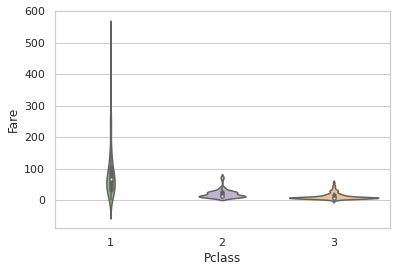

In [26]:
sns.violinplot(data=df_complete, y='Fare', x='Pclass', palette=sns.color_palette(['#7fc97f','#beaed4','#fdc086']))

## Plotnine

Sprawdź co pamiętasz z ggplota! Narysuj wykres przeżywalności mężczyzn i kobiet (`Sex`) z podziałem na typy biletów (`Pclass`)

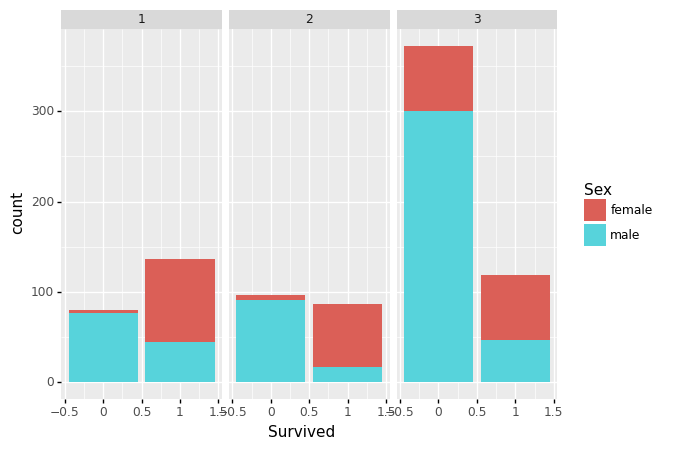

<ggplot: (8762607784241)>

In [51]:
from plotnine import *

ggplot(df, aes('Survived', fill='Sex')) + geom_bar() + facet_wrap('~Pclass')